## DS4400 Coding Exam

This is the coding exam for DS4400. You have 100 minutes in the lecture. Please write down all the codes and in the Code chuck and written answers in the markdown chuck. Add any chuck if you need. Submit the exam as the homework, with both python and pdf file. The exam is open-book, open notes. Please raise your hand if you have any questions. 

#### Question 1: Data analysis
In the following question, you will need to analysis a simulated data. Please answer each question below the instructions. 

In [16]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (
    2 * X["Var1"]
    + 0.5 * X["Var5"]
    - 1 * X["Var10"]
    + np.random.normal(0, 0.5, num_samples)  # Add some noise
)

1. Split the data into training and test data. The proportion of train data should be 70%. 

In [17]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

2. Fit the model with a linear regression using all the features, report the coefficient table, intercept and MSE. 

In [18]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_linear = lm.predict(X_test)
MSE_linear = mean_squared_error(y_test, y_linear)
print(f"The MSE for this linear model is {MSE_linear}")

coef_df = pd.Series(lm.coef_)
print("The coefficient table is: \n", coef_df)

print("The intercept coefficient is %.3f" %lm.intercept_)

The MSE for this linear model is 0.2581677821622019
The coefficient table is: 
 0     2.044796
1    -0.065827
2    -0.071376
3     0.054124
4     0.441769
5     0.050972
6    -0.057804
7    -0.029059
8    -0.131706
9    -1.050051
10    0.001533
11    0.071195
12    0.004165
13   -0.023910
14   -0.018469
15   -0.065016
16    0.014352
17    0.084866
18    0.079323
19    0.072036
dtype: float64
The intercept coefficient is 0.057


3. Fit the model with a polynomial regression with degree 2, report the MSE. Is it necessary to use polynomial regression in this case?

In [19]:
from sklearn.preprocessing import PolynomialFeatures

deg = 2
poly_features = PolynomialFeatures(degree=deg)

X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_fit = poly_model.predict(X_poly_test)

MSE_squared = mean_squared_error(y_test, y_poly_fit)
print(f"The MSE for this quadratic model is {MSE_squared}")

The MSE for this quadratic model is 0.4008640677627225


We observe the MSE for this model is higher than the MSE for the linear model. This should hint that a quadratic model is not a got fit for our data. Moreover, we see that our target variable y is defined as y = 2X_1 + 0.5X_5 - X_10 which is a linear equation, further indicating polynomial regression is not needed in this case.

4. Fit the model with a Lasso regression, tune the parameter for the penalty parameter $\alpha$. Report the best $\alpha$, MSE and which variables are left in the model in the end. 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Tuning alpha for Lasso
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}

# perform gridsearch
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"The tuned alpha value is {best_alpha}")

# Optimized Lasso
alpha = best_alpha

lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

MSE_Lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"The MSE for a Lasso model is {MSE_Lasso}")

The tuned alpha value is 0.01
The MSE for a Lasso model is 0.251809272361641


In [21]:
lasso_coef_df = pd.DataFrame(X.columns)
lasso_coef_df.columns = ['Features']
lasso_coef_df['Coefficient Estimates'] = pd.Series(lasso_model.coef_)
coef_bool = lasso_coef_df['Coefficient Estimates'] != 0
# lasso_coef_df['Coefficient Estimates'] = lasso_coef_df['Coefficient Estimates'][coef_bool]
print(lasso_coef_df)

   Features  Coefficient Estimates
0      Var1               0.576660
1      Var2              -0.009742
2      Var3              -0.010318
3      Var4               0.003577
4      Var5               0.118299
5      Var6               0.005104
6      Var7              -0.003217
7      Var8              -0.000000
8      Var9              -0.030037
9     Var10              -0.288913
10    Var11               0.000000
11    Var12               0.011492
12    Var13              -0.000000
13    Var14              -0.000000
14    Var15              -0.000000
15    Var16              -0.010187
16    Var17              -0.000000
17    Var18               0.010643
18    Var19               0.009741
19    Var20               0.011644


In [22]:
print("All the variables except Var8, Var11, Var13, Var14, Var15, and Var17 are left at the end of model.")

All the variables except Var8, Var11, Var13, Var14, Var15, and Var17 are left at the end of model.


5. Define a new target variable $y_1$ such that $y_1$ only contains all the positive values in the $y$. Process $X$ as well. Fit the model with appropriate GLM model (not Gaussian). Report the MSE and can we compare the MSE with previous questions? Hint: it is a continous distribution. 

In [23]:
y_1 = y[y > 0]
# print(len(y_1))
X['y_1'] = y_1
X.dropna(subset=['y_1'], inplace=True)
# print(X)

# Gamma model
import statsmodels.api as sm

X_train, X_test, y1_train, y1_test = train_test_split(X, y_1, test_size = 0.3)

gamma_model = sm.GLM(y1_train, X_train, family = 
                     sm.families.Gamma(link = sm.families.links.log()))
gamma_results = gamma_model.fit()
y1_pred_gamma = gamma_results.predict(X_test)
mse_gamma = mean_squared_error(y1_test, y1_pred_gamma)

print("MSE for Gamma is: ", mse_gamma)

MSE for Gamma is:  0.14865729110851264


C:\Users\hafid\AppData\Roaming\Python\Python310\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


We choose the Gamma model for this distribution since our target value has continous positive values.
We also observe that the MSE for this model is ~0.149 which is substantially smaller than our previous best model (Linear Regression) which had an MSE of ~0.258. This indicates the Gamma model is a better fit for our data.

6. Define a new target variable $y_2$ such that $y_2$ is a binary categorical variable. If $y$ is larger than 1, then $y_2$ is "group1", otherwise it is "group2". Fit the $y_2$ and $X$ with a logistic regression. Print the summary table with .summary(), and interpret the coefficient for variable 1.  

In [8]:
y2 = (y_1 > 1).astype(int)
# print(y_1)
# print(y2)


X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.3)

model = sm.GLM(y2_train, X_train, family = sm.families.Binomial())
results = model.fit()
y2_pred = results.predict(X_test)
MSE = mean_squared_error(y2_test, y2_pred)
print("MSE for Logistic Regression is: ",MSE)

print(results.summary())

MSE for Logistic Regression is:  0.03291886887997125
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  550
Model:                            GLM   Df Residuals:                      529
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.144
Date:                Mon, 16 Oct 2023   Deviance:                       136.29
Time:                        13:10:07   Pearson chi2:                     216.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6792
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

The Var1 coef. represents the change in the log-odds of y being larger than 1 for a one-unit change of Var1. Since the Var1 coef. is negative, it means that as Var1 increases, the log-odds of y being larger than 1 decrease. In simpler terms, an increase in Var1 is associated with a decrease in the probability of the event happening.

#### Question 2: Implement Gradient descend for Polynomial Regression

Implement gradient descend method for the polynomial regression. Requirement: 
1. Write the method as a function, which is given here. Notice that it takes an input "degree" (and any other necessary inputs) so that we can change the degree of the polynomial. 
2. Output the cost history as well as the coefficient estimates. No need to print it or make the figures. As long as it is one of the output. 
3. Verify your function with the data in Question 1 (You may need to copy/paste and run the answer in Question 1-1 before you run the verification). No need to compare your coefficients to the ones in question 1. This step is only to make sure your functions work. You can set the degree as 2 in the verification. 

Hint: 
1. Don't overthinking the question. What is the difference between linear regression and polynomial regression?
2. You may need two functions here. One for pre-processing the data, while the other one for gradient desent. You can add more if you need. Like to add another one for the cost function. 
3. When initializing the theta, think about how many coefficients you may need?

In [54]:
from sklearn.preprocessing import PolynomialFeatures

def poly_function(degree, X):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    return X_poly

def compute_cost(predictions, y):
    cost = np.mean(np.square(predictions - y))
    
    return cost

def poly_gradient_descent(X, y, num_iterations, learning_rate, degree):
    n = len(y)
    cost_history = np.zeros(num_iterations)
    X_poly = poly_function(degree, X)
    
     # Initialize theta with zeros
    total_features = X_poly.shape[1]
    theta = np.zeros(total_features)
    
    for i in range(num_iterations):
        predictions = X_poly.dot(theta)
        errors = predictions - y
        gradient = (2/n) * (errors.T.dot(X_poly))
        theta -= learning_rate * gradient.T
        cost_history[i] = compute_cost(predictions, y)
        
    return theta, cost_history

In [55]:
# Set a random seed for reproducibility
np.random.seed(4400)

# Number of samples
num_samples = 1000

# Create 20 random variables
X = pd.DataFrame()
for i in np.arange(1, 21):
    variable_name = f"Var{i}"
    X[variable_name] = np.random.rand(1000)

# Create a target variable based on some combination of the 20 variables
y = (
    2 * X["Var1"]
    + 0.5 * X["Var5"]
    - 1 * X["Var10"]
    + np.random.normal(0, 0.5, num_samples)  # Add some noise
)

In [56]:
degree = 2

# Hyperparameters
learning_rate = 0.01
num_iterations = 100

# Run gradient descent
theta_final, cost_history = poly_gradient_descent(X, y, num_iterations, learning_rate, degree)

# Print the final parameters (theta) after training
print("Final theta:")
print(theta_final)

print("Cost History:")
print(cost_history)

Final theta:
[ 5.51012930e-02  2.19402395e-01  7.54772733e-03  4.39097686e-03
  1.54345869e-02  5.99654282e-02  2.16342738e-02  2.14145978e-02
  1.82570240e-02  1.11236336e-02 -9.27284254e-02  1.37268561e-02
  2.56903398e-02  1.90417967e-02  1.92172197e-02  6.59892462e-03
  5.81063274e-03  1.54610366e-03  1.94559797e-02  1.59776506e-02
  2.43785499e-02  2.04630112e-01  1.02117620e-01  9.80080893e-02
  1.10977194e-01  1.21967419e-01  1.11017522e-01  1.07218023e-01
  1.05181820e-01  9.79264334e-02  5.45423069e-02  1.02988265e-01
  1.03661012e-01  1.03377661e-01  1.03133234e-01  9.96068928e-02
  9.86799275e-02  9.65423338e-02  1.07522489e-01  1.06283909e-01
  1.08754406e-01 -6.82469641e-04 -6.62281829e-03 -5.21318809e-03
  2.01186738e-02  2.97770210e-03 -2.80724870e-04 -4.38937943e-03
 -1.93188137e-05 -5.73304771e-02 -2.04836693e-03 -4.53715223e-03
  1.65117346e-03 -5.38199766e-03 -6.47407617e-03 -1.07233501e-02
 -5.28876122e-03  3.80770659e-04 -4.97053086e-03  1.28335941e-03
 -7.93874049

#### Question 3: Simulation study

Following is a simulation study. In the second code chuck, please correctly label the xlabel and ylabel for the plot. Also explain what this code is trying to do and what you have learned from the generated figure. 

Hint: in the simulation data, there are 200 observations and it is fixed for each trial. After spliting the training and testing data, each one will have 100 observations. 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(83)
A = np.arange(5,101,1)
B = []

for p in A:
    
    X = pd.DataFrame()
    for i in np.arange(1, p+1):
        variable_name = f"Var{i}"
        X[variable_name] = np.random.rand(200)

    y = 2 * X["Var1"] - 0.5 * X["Var5"] + np.random.normal(0, 0.5, 200)
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.5, 
                                                        random_state=83)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    value = mean_squared_error(y_test, y_pred)
    B.append(value)

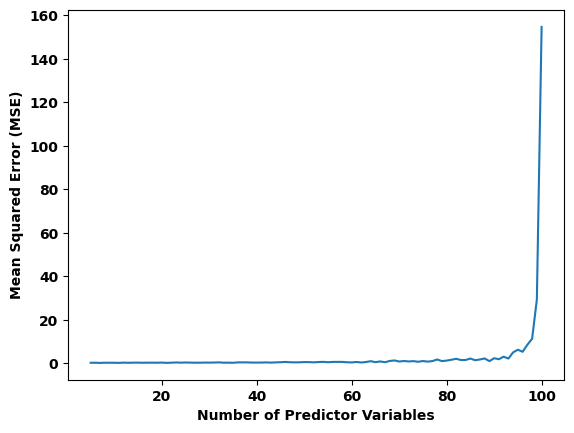

In [25]:
plt.plot(A, B)
plt.xlabel("Number of Predictor Variables")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

For each value of 'p' in A (range from 5 to 100 inclusive), a DataFrame 'X' is created with 'p' random predictor variables ('Var1', 'Var2', ..., 'Varp'). The response variable 'y' is generated as a linear combination of 'Var1' and 'Var5' plus some random noise.

The data is then split into training and testing sets with 50% test data and 50% train data. A linear regression model is trained using the training set, and a prediction is obtained using the linear model for the testing set. Lastly, the MSE is computed for each value of 'p'.

We then plot the MSE values for each 'p' against the number of predictor variables ('Var1', 'Var2', ..., 'Varp').

We see that after a certain number of predictor variables, our MSE skyrockets indicating that more predictor variables are not always better. There's a relationship between model complexity (number of features) and prediction accuracy.
For this data in particular, we observe lower MSE's when the number of predictor variables is less than 20.